# Mecánica Celeste: teoría, algoritmos y problemas
# Por Jorge I. Zuluaga

En estos cuadernos hemos compilado la mayoría de los códigos que vienen con el libro [**Mecánica Celeste: teoría, algoritmos y problemas**](https://www.libreriadelau.com/bw-mecanica-celeste-teoria-algoritmos-y-problemas-u-de-antioquia-fisica/p). En cada cuaderno encontrará códigos de secciones o capítulos enteros. Para explicaciones detalladas de lo que hacen los códigos refiérase a la sección o capítulo respectivo. Para mayor comodidad puede leer o ejecutar este cuaderno usando `Google Colab`.

<a target="_blank" href="https://colab.research.google.com/github/seap-udea/pymcel/blob/main/ejemplos/cuadernos-libro/mcel_zuluaga-doscuerpos.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Algorítmos del Problema de los dos Cuerpos

### Instalación e importación

Si está usando este cuaderno en `Colab` debería instalar `pymcel` antes de comenzar: 

In [16]:
!pip install -Uq pymcel

In [1]:
# Este código se usa solamente para desarrollar estos cuadernos pero es inocuo en otros contextos
%load_ext autoreload 
%autoreload 2

### Motivación y sistemas jerárquicos

Simulamos un sistema de tres cuerpos y graficamos la trayectoria en 3D:

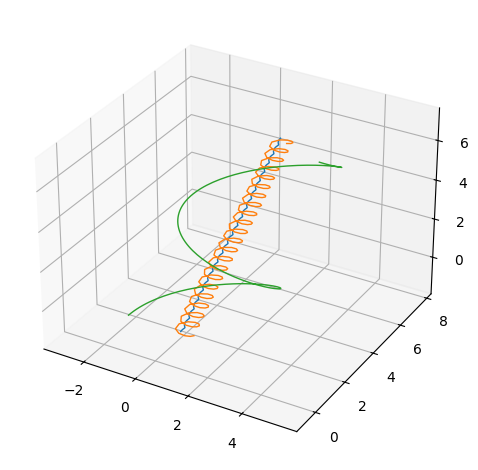

In [3]:
sistema=[
    dict(
        m=10.0,
        r=[1,0,0],
        v=[0,1,0.5]),
    dict(
        m=1.0,
        r=[1.5,0,0],
        v=[0,-3,1],
    ),
    dict(
        m=0.1,
        r=[-1,0,0],
        v=[0,3,0],
    )
]

from numpy import linspace

#Solución
from pymcel.export import ncuerpos_solucion 
rs,vs,rps,vps,constantes=ncuerpos_solucion(sistema,
                                           linspace(0.0,10.0,200))

#Gráfica en el sistema de referencia inercial original
from pymcel.export import plot_ncuerpos_3d
fig=plot_ncuerpos_3d(rs,vs)

Si nos pasamos al sistema del centro de masa nos damos cuenta que el movimiento es más sencillo:

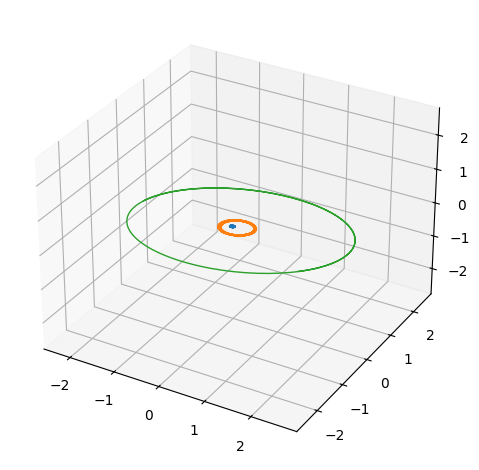

In [4]:
#Gráfica en el sistema de referencia del centro de masa
from pymcel.export import plot_ncuerpos_3d
fig=plot_ncuerpos_3d(rps,vps);

### El hodografo del sistema de los dos cuerpos

Para estudiar el hodógrafo de los dos cuerpos escogemos unas condiciones iniciales específicas y calculamos las propiedades de la órbita resultante:

In [7]:
#Condiciones iniciales
mu=1 #unidades canónicas (u.c.)
from numpy import array
x0=1.0 #u.c.
vy0=0.73 #u.c.

#Magnitud de h
h=x0*vy0

#Energía específica relativa
from numpy.linalg import norm
epsilon=0.5*vy0**2-mu/x0

#Parámetros geométricos derivados
from numpy import sqrt
p=h**2/mu
e=sqrt(1+2*epsilon*h**2/mu**2)
a=p/(1-e**2)

print(f"p = {p}")
print(f"a = {a}")
print(f"e = {e}")

p = 0.5328999999999999
a = 0.6816167950378297
e = 0.46710000000000007


Ahora calcularemos las componentes de la velocidad de la partícula:

In [8]:
#Valores de la anomalía verdadera
from numpy import linspace,pi
fs=linspace(0,2*pi,100)

#Valores de r
from numpy import sin,cos
rs=p/(1+e*cos(fs))

#Valores de v
vs=sqrt(mu*(2/rs-1/a))

#Valores de phi
from numpy import arcsin,zeros_like
phis=zeros_like(fs)
for i,f in enumerate(fs):
    if f<pi:
        phis[i]=arcsin(h/(rs[i]*vs[i]))
    else:
        phis[i]=pi-arcsin(h/(rs[i]*vs[i]))

#Valores de tetav
from numpy import mod
tetavs=phis+fs

#Componentes de la velocidad
from numpy import sin
vxs=vs*cos(tetavs)
vys=vs*sin(tetavs)

Graficamos las componentes para poner en evidencia el hodografo:

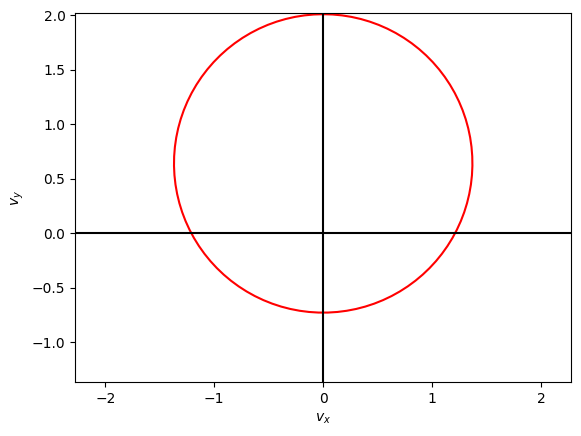

In [9]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.gca()

#Grafica
ax.plot(vxs,vys,'r')

#Decoración
from pymcel.plot import fija_ejes_proporcionales
valores=(vxs,vys)
xrango,yrango=fija_ejes_proporcionales(ax,valores,xcm=0)

#Dibuja ejes
ax.plot(xrango,[0,0],'k-');
ax.plot([0,0],yrango,'k-');
ax.set_xlabel("$v_x$");
ax.set_ylabel("$v_y$");

### La órbita osculatriz

Resolvemos numéricamente un sistema de 2 cuerpos:

In [10]:
from numpy import array
sistema=[
    dict(m=1.0,
         r=array([0.0,0.0,+0.3]),
         v=array([+1.0,0.0,0.5])),
    dict(m=0.5,
         r=array([+1.0,0.0,0.0]),
         v=array([0.0,+1.0,0.0])),
]

# Propiedades del sistema
from numpy.linalg import norm
mu=sistema[0]["m"]+sistema[1]["m"]
rvec=sistema[0]["r"]-sistema[1]["r"]
r=norm(rvec)
vvec=sistema[0]["v"]-sistema[1]["v"]
v=norm(vvec)

print(f"mu = {mu}")
print(f"r_vec = {rvec}")
print(f"r = {r}")
print(f"v_vec = {vvec}")
print(f"v = {v}")

mu = 1.5
r_vec = [-1.   0.   0.3]
r = 1.044030650891055
v_vec = [ 1.  -1.   0.5]
v = 1.5


A partir de las condiciones iniciales calculamos los vectores clave:

In [12]:
from numpy import cross
from numpy.linalg import norm

#Momento angular relativo específico
hvec=cross(rvec,vvec)
h=norm(hvec)
#Vector excentricidad
evec=cross(vvec,hvec)/mu-rvec/r
e=norm(evec)
#Vector nodo ascendente
nvec=cross([0,0,1],hvec)
n=norm(nvec)

print(f"hvec = {hvec}")
print(f"h = {h}")
print(f"evec = {evec}")
print(f"e = {e}")
print(f"nvec = {nvec}")
print(f"n = {n}")

hvec = [0.3 0.8 1. ]
h = 1.3152946437965904
evec = [ 0.02449295 -0.56666667  0.44598545]
e = 0.7215358864417007
nvec = [-0.8  0.3  0. ]
n = 0.8544003745317532


Obtenemos los parámetros de tamaño y forma:

In [14]:
#Semilatus rectum
p=h**2/mu
#Semieje mayor
a=p/(1-e**2)
#Velocidad angular promedio
from numpy import sqrt
nmed=sqrt(mu/abs(a)**3)

print(f"p = {p} u.c.")
print(f"a = {a} u.c.")
print(f"nmed = {nmed} u.c.")

p = 1.153333333333333 u.c.
a = 2.405855445416549 u.c.
nmed = 0.3282020847560834 u.c.


Obtenemos ahora los parámetros de orientación de la órbita:

In [16]:
from numpy import dot,arccos,pi
i=arccos(hvec[2]/h)

Wp=arccos(nvec[0]/n)
W=Wp if nvec[1]>0 else 2*pi-Wp

wp=arccos(dot(nvec,evec)/(e*n))
w=wp if evec[2]>0 else 2*pi-wp

fp=arccos(dot(rvec,evec)/(r*e))
f0=fp if dot(rvec,vvec)>0 else 2*pi-fp

print(f"i = {i*180/pi} grados")
print(f"W = {W*180/pi} grados")
print(f"w = {w*180/pi} grados")
print(f"f_0 = {f0*180/pi} grados")

i = 40.510589437332754 grados
W = 159.44395478041653 grados
w = 107.91123121198778 grados
f_0 = 278.34291953929824 grados


Usando los elementos orbitales podemos predecir la posición en una anomalía verdadera cualquiera:

In [17]:
#Anomalía verdadera
f=pi/2

#Distancia al punto
from numpy import cos
r=p/(1+e*cos(f))

from numpy import cos,sin
x=r*(cos(W)*cos(w+f)-cos(i)*sin(W)*sin(w+f))
y=r*(sin(W)*cos(w+f)+cos(i)*cos(W)*sin(w+f))
z=r*sin(i)*sin(w+f)

from numpy import array
r_nuevo=array([x,y,z])

#Parametro mu/h
muh=mu/h

vx=muh*(-cos(W)*sin(w+f)-cos(i)*sin(W)*cos(w+f))\
   -muh*e*(cos(W)*sin(w)+cos(w)*cos(i)*sin(W))
vy=muh*(-sin(W)*sin(w+f)+cos(i)*cos(W)*cos(w+f))\
   +muh*e*(-sin(W)*sin(w)+cos(w)*cos(i)*cos(W))
vz=muh*(sin(i)*cos(w+f)+e*cos(w)*sin(i))

from numpy import array
v_nuevo=array([vx,vy,vz])

Podemos verificar si las condiciones nuevas son las correctas calculando el momentum angular relativo específico:

In [18]:
from numpy import cross
hvec_nuevo=cross(r_nuevo,v_nuevo)

print(f"Inicial, hvec = {hvec}")
print(f"Nueva posición, hvec = {hvec_nuevo}")

Inicial, hvec = [0.3 0.8 1. ]
Nueva posición, hvec = [0.3 0.8 1. ]


Comparemos la órbita predicha con este formalismo y la obtenida con la solución numérica:

Paquete pymcel cargado. Versión: 0.6.0


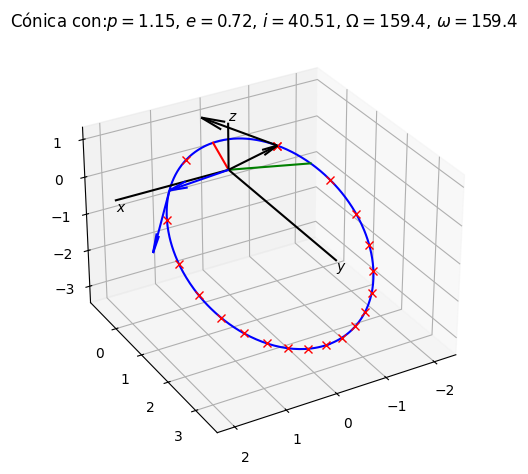

In [23]:
#Tiempo característico de la cónica
#Si la cónica es una elipse este es el período
from numpy import pi
T=2*pi/nmed

#Tiempos 
from numpy import linspace
ts=linspace(0,T,20)

#Solución a las e.d.m. del sistema
from pymcel.export import ncuerpos_solucion
rs,vs,rps,vps,constantes=ncuerpos_solucion(sistema,ts)

rs_num=rs[0,:,:]-rs[1,:,:]
vs_num=vs[0,:,:]-vs[1,:,:]

#Visualización de la cónica 
from numpy import pi
from pymcel.export import conica_de_elementos
fig=conica_de_elementos(p,e,i*180/pi,W*180/pi,w*180/pi,figreturn=True)
ax=fig.gca()
#Posición y velocidad inicial
ax.quiver(0,0,0,
          rvec[0],rvec[1],rvec[2],
          color='k');
ax.quiver(rvec[0],rvec[1],rvec[2],
          vvec[0],vvec[1],vvec[2],
          color='k');

#Posición y velocidad nueva
ax.quiver(0,0,0,
          r_nuevo[0],r_nuevo[1],r_nuevo[2],
          color='b');
ax.quiver(r_nuevo[0],r_nuevo[1],r_nuevo[2],
          v_nuevo[0],v_nuevo[1],v_nuevo[2],
          color='b');

#Posiciones calculadas numéricamente
ax.plot(rs_num[:,0],rs_num[:,1],rs_num[:,2],'rx');

fig.tight_layout()

### La ecuación de Halley

Un ejemplo de solución exacta y aproximada de la ecuación de Halley:

In [25]:
#Constantes del sistema
mu=1.0
h=3.0

#Tamaño de la parabola
p=h**2/mu

#Tiempo de paso por el periapsis
tp=0.0

#Tiempo en el que deseamos calcular f
t=1.0

#Anomalía media parabólica
from numpy import sqrt
Mp=3*sqrt(mu/p**3)*(t-tp)

#Variable auxiliar
y=(Mp+sqrt(1+Mp**2))**(1./3)

#Raíz de la ecuación de Halley
z=y-1/y

#Anomalía verdadera
from numpy import arctan
f=2*arctan(z)

#Aproximación de la anomalía media
faprox=(4./3)*Mp

#Polinomio cúbico en z
polinomio=z**3+3*z-2*Mp

from numpy import pi
print(f"Porpiedades del sistema: h={h:g}, mu={mu:g}, tp={tp:g}")
print(f"Solución al problema de Kepler en t = {t:g}:")
print(f"Anomalía parabólica: Mp = {Mp*180/pi:g} grados")
print(f"Variable auxiliar: y = {y:.7f}")
print(f"Anomalía verdadera: z = tan(f/2) = {z:.7f}")
print(f"Anomalía verdadera: f = {f*180/pi:.7f} grados")
print(f"Aproximación: 4/3 Mp = {faprox*180/pi:.7f} grados")
print(f"Polinomio: z^3 + 3z - 2Mp = {polinomio}")

Porpiedades del sistema: h=3, mu=1, tp=0
Solución al problema de Kepler en t = 1:
Anomalía parabólica: Mp = 6.3662 grados
Variable auxiliar: y = 1.0376528
Anomalía verdadera: z = tan(f/2) = 0.0739393
Anomalía verdadera: f = 8.4574333 grados
Aproximación: 4/3 Mp = 8.4882636 grados
Polinomio: z^3 + 3z - 2Mp = 7.494005416219807e-16


### La función de Kepler 

La ecuación de Kepler en forma general:

In [28]:
def funcion_kepler(G,M=0,e=0):
    #Parametro sigma
    sigma=+1 if e<1 else -1
    #Funciones cG, sG
    from numpy import cos,cosh,sin,sinh
    cG=cos(G) if e<1 else cosh(G)
    sG=sin(G) if e<1 else sinh(G)
    #Función de Kepler
    k=sigma*(G-e*sG)-M
    #Primera derivada
    kp=sigma*(1-e*cG)
    #Segunda derivada
    kpp=e*sG
    return k,kp,kpp

En el código a continuación se estudia el comportamiento de la ecuación de Kepler:

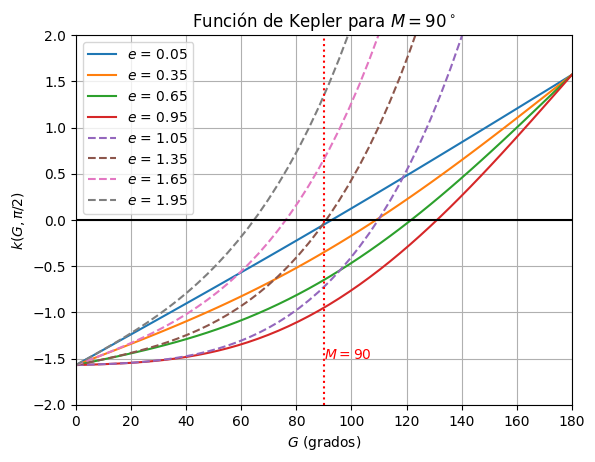

In [29]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.gca()

#Valor de la anomalía media
from numpy import pi
M=pi/2

#Valores posibles de G
from numpy import linspace
Gs=linspace(0,2*M)

#Caso elíptico
es=linspace(0.05,0.95,4)
for e in es:    
    ks,kps,kpps=funcion_kepler(Gs,M,e)
    ax.plot(Gs*180/pi,ks,label=f"$e$ = {e}",ls='-');

#Caso hiperbólico
es=linspace(1.05,1.95,4)
for e in es:    
    ks,kps,kpps=funcion_kepler(Gs,M,e)
    ax.plot(Gs*180/pi,ks,label=f"$e$ = {e}",ls='--');
   
#Decoración
ax.axhline(0,color='k')
ax.axvline(M*180/pi,color='r',linestyle='dotted')
ax.text(M*180/pi,-1.5,f"$M={M*180/pi:g}$",color='r')
ax.legend()
ax.set_xlim((0,2*M*180/pi))
ax.set_ylim((-2,2))
ax.set_xlabel("$G$ (grados)")
ax.set_ylabel("$k(G,\pi/2)$")
ax.set_title(f"Función de Kepler para $M = {M*180/pi:g}^\circ$")
ax.grid();



Una versión interactiva es:

In [33]:
from ipywidgets import interact

@interact(M=(0,360,10),e=(1e-3,2,0.05))
def grafica_funcion_kepler(M=90,e=0.5):
    #Valores de entrada
    from numpy import pi
    M=float(M)*pi/180 #M entra en grados
    e=float(e)
        
    #Grafica
    import matplotlib.pyplot as plt
    plt.close("all")
    fig=plt.figure()
    ax=fig.gca()

    #Valores posibles de G
    Gs=linspace(0,2*M)
    ks,kps,kpps=funcion_kepler(Gs,M,e)
    ax.plot(Gs*180/pi,ks);

    #Decoración
    yext=-funcion_kepler(0,M,e)[0]
    ax.axhline(0,color='k')
    ax.axvline(M*180/pi,color='r',linestyle='dotted')
    ax.text(M*180/pi,-2*yext/3,f"$M={M*180/pi:g}$",color='r')
    
    if e<1.5:
        xmax=min(2*M*180/pi,360)
    else:
        xmax=M/(e-1)*180/pi

    ax.set_xlim((0,xmax))
    ax.set_ylim((-yext,yext))
    ax.set_title(f"Función de Kepler para $M = {M*180/pi:g}^\circ$")
    ax.set_xlabel("$G$ (grados)")
    ax.set_ylabel("$k(G,\pi/2)$")
    ax.grid();

    plt.show()

interactive(children=(IntSlider(value=90, description='M', max=360, step=10), FloatSlider(value=0.5, descripti…

### Solución numérica a la ecuación de Kepler

El método de Kepler:

In [36]:
e=0.5
M=37 #grados
E0=45 

from numpy import pi
M=M*pi/180
E0=E0*pi/180

from numpy import sin
M0=E0-e*sin(E0)

print(f"M0 = {M0*180/pi} grados")

epsilon0=M-M0
E1=E0+epsilon0

print(f"epsilon0 = {epsilon0*180/pi}")
print(f"E1 = {E1*180/pi} grados")

M1=E1-e*sin(E1)
epsilon1=M-M1
E2=E1+epsilon1

print(f"M1 = {M1*180/pi}")
print(f"epsilon1 = {epsilon1*180/pi}")
print(f"E2 = {E2*180/pi}")

M0 = 24.742882886465114 grados
epsilon0 = 12.257117113534887
E1 = 57.25711711353489 grados
M1 = 33.16119928670333
epsilon1 = 3.8388007132966724
E2 = 61.09591782683156


Se puede hacer un código general para más pasos:

In [37]:
En=E2
for i in range(5):
    Mn=En-e*sin(En)
    en=M-Mn
    En=En+en
    print(f"Paso {i+3}: M{i+2} = {Mn*180/pi:.2f} gr., epsilon{i+2} = {en*180/pi:.3f} gr., E{i+3} = {En*180/pi:.5f} gr.")

Paso 3: M2 = 36.02 gr., epsilon2 = 0.983 gr., E3 = 62.07922 gr.
Paso 4: M3 = 36.77 gr., epsilon3 = 0.234 gr., E4 = 62.31316 gr.
Paso 5: M4 = 36.95 gr., epsilon4 = 0.055 gr., E5 = 62.36772 gr.
Paso 6: M5 = 36.99 gr., epsilon5 = 0.013 gr., E6 = 62.38038 gr.
Paso 7: M6 = 37.00 gr., epsilon6 = 0.003 gr., E7 = 62.38332 gr.


Usando la rutina de pymcel con el método de Kepler:

In [40]:
from pymcel import kepler_kepler
E,error,ni=kepler_kepler(M,e,E0,1e-8)

print(f"M = {M*180/pi:.2g}, e = {e:.2f}")
print(f"E estimada (promedio últimos dos pasos) = {E*180/pi:.14f}")
print(f"Error absoluto = {error*M*180/pi:.1e} grados")
print(f"Intervalo = [{(E-2*error*M)*180/pi},{(E+2*error*M)*180/pi}] grados")
print(f"Número de iteraciones: {ni}")

M = 37, e = 0.50
E estimada (promedio últimos dos pasos) = 62.38420178431245
Error absoluto = 1.1e-07 grados
Intervalo = [62.38420157333525,62.384201995289665] grados
Número de iteraciones: 14


Usando el método de Newton-Raphson:

In [43]:
from pymcel import kepler_newton
E,error,ni=kepler_newton(M,e,E0,1e-8)

print(f"M = {M*180/pi:.2g}, e = {e:.2f}")
print(f"E estimada (promedio últimos dos pasos) = {E*180/pi:.14f}")
print(f"Error absoluto = {error*E*180/pi:.1e} grados")
print(f"Intervalo = [{(E-error*E)*180/pi},{(E+error*E)*180/pi}] grados")
print(f"Número de iteraciones: {ni}")

M = 37, e = 0.50
E estimada (promedio últimos dos pasos) = 62.38420186888202
Error absoluto = 0.0e+00 grados
Intervalo = [62.38420186888202,62.38420186888202] grados
Número de iteraciones: 5


Usando el método de Laguerre-Conway:

In [44]:
from pymcel.export import funcion_kepler,metodo_laguerre
E,error,ni=metodo_laguerre(funcion_kepler,x0=E0,delta=1e-8,args=(M,e))

print(f"M = {M*180/pi:.2g}, e = {e:.2f}")
print(f"E estimada (promedio últimos dos pasos) = {E*180/pi:.14f}")
print(f"Error absoluto = {error*E*180/pi:.1e} grados")
print(f"Intervalo = [{(E-error*E)*180/pi},{(E+error*E)*180/pi}] grados")
print(f"Número de iteraciones: {ni}")

M = 37, e = 0.50
E estimada (promedio últimos dos pasos) = 62.38420186756679
Error absoluto = 2.6e-09 grados
Intervalo = [62.38420186493632,62.384201870197266] grados
Número de iteraciones: 3


Usando métodos de horquillado:

In [46]:
from numpy import pi
from scipy import optimize

#Recuerde que funcion_kepler devuelve también las derivadas
from pymcel.export import funcion_kepler
kepler=lambda G,M,e:funcion_kepler(G,M,e)[0]

#Método de bisección
E_bis,info_bis=optimize.bisect(kepler,M-e,M+e,rtol=1e-8,
                               args=(M,e),full_output=True)
ni_bis=info_bis.iterations

#Método de Brent
E_bre,info_bre=optimize.brentq(kepler,M-e,M+e,rtol=1e-8,
                               args=(M,e),full_output=True)
ni_bre=info_bre.iterations

#Método de Ridder
E_rid,info_rid=optimize.ridder(kepler,M-e,M+e,rtol=1e-8,
                               args=(M,e),full_output=True)
ni_rid=info_rid.iterations

print(f"M = {M*180/pi:.2g}, e = {e:.2f}")
print(f"Bisección:",
      f"E = {E_bis*180/pi:.17f}",
      f"iteraciones = {ni_bis}")
print(f"Brent:",
      f"E = {E_bre*180/pi:.17f}",
      f"iteraciones = {ni_bre}")
print(f"Ridder:",
      f"E = {E_rid*180/pi:.17f}",
      f"iteraciones = {ni_rid}")

M = 37, e = 0.50
Bisección: E = 62.38420210930057408 iteraciones = 27
Brent: E = 62.38420186878084195 iteraciones = 6
Ridder: E = 62.38420218086032065 iteraciones = 4


Otros métodos:

In [47]:
from pymcel.export import kepler_semianalitico
E,error,ni=kepler_semianalitico(M,e)

print(f"M = {M*180/pi:.2g}, e = {e:.2f}")
print(f"E estimada (promedio últimos dos pasos) = {E*180/pi:.14f}")
print(f"Error absoluto = {error*E*180/pi:.1e} grados")
print(f"Intervalo = [{(E-error*E)*180/pi},{(E+error*E)*180/pi}] grados")
print(f"Número de iteraciones: {ni}")

M = 37, e = 0.50
E estimada (promedio últimos dos pasos) = 62.38761309530199
Error absoluto = 4.4e-03 grados
Intervalo = [62.38319428043351,62.392031910170466] grados
Número de iteraciones: 1


Se puede calcular el error de esta fórmula semianalítica:

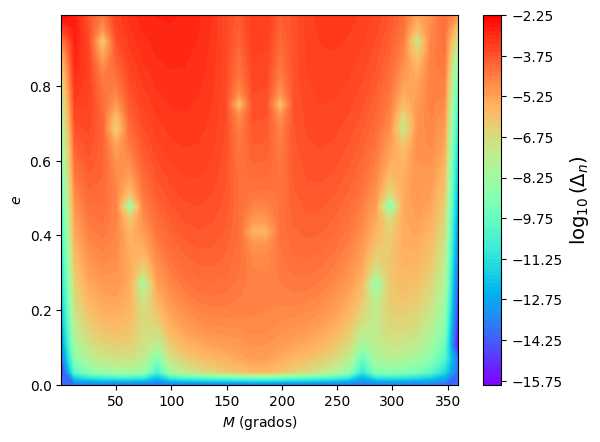

In [49]:
from numpy import linspace,pi,zeros,log10

#Valores de e y M
Ne=30
es=linspace(0,0.99,Ne)
NM=30
Ms=linspace(0.01,2*pi-0.01,NM)

#Construye la matriz de errores
log_errores=zeros((Ne,NM))
for i,ex in enumerate(es):
    for j,Mx in enumerate(Ms):
        E,error,ni=kepler_semianalitico(Mx,ex)
        log_errores[i,j]=log10(error) if error>0 else -14
        
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.gca()

#Gráfico de contorno
contorno=plt.contourf(Ms*180/pi,es,log_errores,
                      cmap="rainbow",levels=100)
color=plt.colorbar(contorno)
color.set_label("$\log_{10}(\Delta_n)$",fontsize=14)

#Decoración
ax.set_xlabel("$M$ (grados)");
ax.set_ylabel("$e$");


El comportamiento de la solución de la ecuación de Kepler:

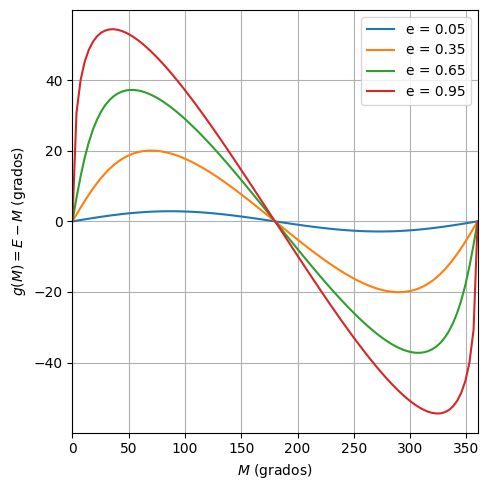

In [50]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
ax=fig.gca()

from numpy import array,linspace,pi
es=linspace(0.05,0.95,4)
Ms=linspace(0,2*pi,100)

for ex in es:
    #Valores de la anomalía excéntrica
    Es=[kepler_semianalitico(Mx,ex)[0] for Mx in Ms]
    ax.plot(array(Ms)*180/pi,array(Es)*180/pi-array(Ms)*180/pi,label=f"e = {ex:.2f}");
    
#Decoración
ax.legend();
ax.set_xlim((0,360))

ax.set_xlabel("$M$ (grados)")
ax.set_ylabel("$g(M)=E-M$ (grados)")
ax.grid()
fig.tight_layout()



### Solución analítica por aproximaciones sucesivas

Se puede usar la rutina de `pymcel` para el cálculo por aproximaciones sucesivas:

In [52]:
from pymcel import kepler_aproximacion

E1,error1,ni1=kepler_aproximacion(M,e,orden=1)
E2,error2,ni1=kepler_aproximacion(M,e,orden=2)
E3,error3,ni1=kepler_aproximacion(M,e,orden=3)

print(f"M = {M*180/pi:.2g}, e = {e:.2f}")
print(f"E (orden e) = {E1*180/pi:.7f} (error {error1*M*180/pi})")
print(f"E (orden e^2) = {E2*180/pi:.7f} (error {error2*M*180/pi})")
print(f"E (orden e^3) = {E3*180/pi:.7f} (error {error3*M*180/pi})")

M = 37, e = 0.50
E (orden e) = 54.2407304 (error 6.006443353743711)
E (orden e^2) = 61.1252602 (error 0.9610525147400825)
E (orden e^3) = 63.0938414 (error 0.5471173899178785)


Se puede encontrar la solución usando una serie de orden arbitrario en $e$:

In [53]:
from pymcel.export import kepler_eserie
E8,error8,ni1=kepler_eserie(M,e,orden=8)

print(f"M = {M*180/pi:.2g}, e = {e:.2f}")
print(f"E (orden e^8) = {E8*180/pi:.7f} (error {error8*M*180/pi})")

M = 37, e = 0.50
E (orden e^8) = 62.3103928 (error 0.003867448222173536)


### Solución por series de la ecuación de Kepler

La solución usando la expansión elíptica es:

In [55]:
from pymcel.export import kepler_bessel
E,error,ni=kepler_bessel(M,e,1e-8)

print(f"M = {M*180/pi:.2g}, e = {e:.2f}")
print(f"E estimada (promedio últimos dos pasos) = {E*180/pi:.14f}")
print(f"Error absoluto = {error*E*180/pi:.1e} grados")
print(f"Intervalo = [{(E-error*E)*180/pi},{(E+error*E)*180/pi}] grados")
print(f"Número de iteraciones: {ni}")

M = 37, e = 0.50
E estimada (promedio últimos dos pasos) = 62.38420129936800
Error absoluto = 8.0e-08 grados
Intervalo = [62.38420121961613,62.38420137911987] grados
Número de iteraciones: 30


### Eficiencia de los métodos de solución

A continuación se compara el tiempo que toma la solución con los distintos métodos estudiados aquí para las siguientes condiciones:

In [58]:
e=0.48
M=298*pi/180

E,delta_semi,ni=kepler_semianalitico(M,e)
print(f"E = {E*180/pi}")
print(f"Error = {delta_semi}")


E = 270.4990668992051
Error = 7.451523386894413e-09


Este código hace la comparación de los tiempos usando el comando `timeit`:

In [59]:
from pymcel.export import funcion_kepler
kepler=lambda G,M,e:funcion_kepler(G,M,e)[0]

print("Semianalítico:")
%timeit -n 1000 kepler_semianalitico(M,e)
print("Newton:")
%timeit -n 1000 kepler_newton(M,e,E0,delta_semi)
print("Kepler (punto fijo):")
%timeit -n 1000 kepler_kepler(M,e,E0,delta_semi)
print("Método de bisección:")
%timeit -n 1000 optimize.bisect(kepler,0,2*pi,rtol=delta_semi,args=(M,e))
print("Método de Brent:")
%timeit -n 1000 optimize.brentq(kepler,0,2*pi,rtol=delta_semi,args=(M,e))
print("Método de Ridder:")
%timeit -n 1000 optimize.ridder(kepler,0,2*pi,rtol=delta_semi,args=(M,e))
print("Aproximaciones sucesivas:")
%timeit -n 1000 kepler_eserie(M,e,delta_semi)
print("Serie de Fourier con coeficientes de Bessel:")
%timeit -n 1000 kepler_bessel(M,e,delta_semi)

Semianalítico:
2.91 µs ± 158 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Newton:
28.1 µs ± 5.76 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Kepler (punto fijo):
4.74 µs ± 171 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Método de bisección:
110 µs ± 11.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Método de Brent:
30.8 µs ± 681 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Método de Ridder:
48.3 µs ± 1.23 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Aproximaciones sucesivas:
189 µs ± 5.72 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Serie de Fourier con coeficientes de Bessel:
45.3 µs ± 8.04 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Otra manera de hacerlo:

In [60]:
#Valores 
#Usa una tolerancia igual al error de la rutina semianalítica
delta=delta_semi
#Podría usar una tolerancia mucho menor si descomenta la línea abajo
#delta=1e-12
#Puede usar unos valores distintos de e y M para probar
#e=0.48
#M=298*pi/180
repeticiones=1000
from timeit import Timer
t_sem=Timer("kepler_semianalitico(M,e)",
            globals=globals()).timeit(repeticiones)/repeticiones*1e6
t_new=Timer("kepler_newton(M,e,E0,delta)",
            globals=globals()).timeit(repeticiones)/repeticiones*1e6
t_kep=Timer("kepler_kepler(M,e,E0,delta)",
            globals=globals()).timeit(repeticiones)/repeticiones*1e6
t_bis=Timer("optimize.bisect(kepler,0,2*pi,rtol=delta,args=(M,e))",
            globals=globals()).timeit(1000)/repeticiones*1e6
t_bre=Timer("optimize.brentq(kepler,0,2*pi,rtol=delta,args=(M,e))",
            globals=globals()).timeit(1000)/repeticiones*1e6
t_rid=Timer("optimize.ridder(kepler,0,2*pi,rtol=delta,args=(M,e))",
            globals=globals()).timeit(1000)/repeticiones*1e6
t_ese=Timer("kepler_eserie(M,e,delta)",
            globals=globals()).timeit(1000)/repeticiones*1e6
t_bes=Timer("kepler_bessel(M,e,delta)",
            globals=globals()).timeit(1000)/repeticiones*1e6

Un gráfico de los resultados sería:

/tmp/ipykernel_120717/533705734.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(etiquetas);


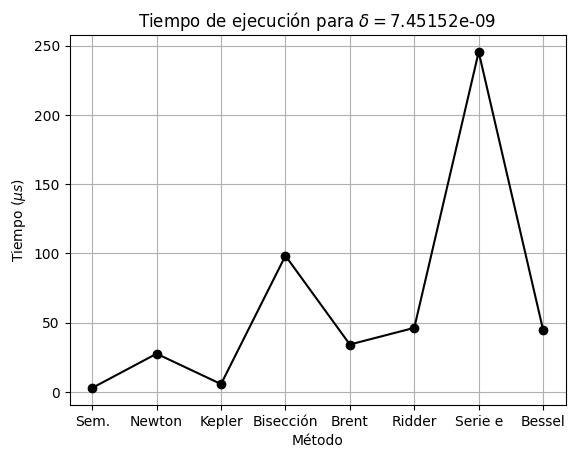

In [61]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.gca()
valores=[t_sem,t_new,t_kep,t_bis,t_bre,t_rid,t_ese,t_bes]
etiquetas=["","Sem.","Newton","Kepler","Bisección","Brent","Ridder","Serie e","Bessel"]
ax.plot(valores,'ko-');
ax.set_xticklabels(etiquetas);

#Decoración
ax.grid()
ax.set_xlabel("Método");
ax.set_ylabel("Tiempo ($\mu s$)");
ax.set_title(f"Tiempo de ejecución para $\delta=${delta:g}");

### Una síntesis del problema de los dos cuerpos: ejemplo numérico

Condiciones iniciales:

In [63]:
from numpy import array
t0=0
sistema=[
    dict(m=1.0,
         r=array([0.0,0.0,+0.3]),
         v=array([+1.0,0.0,0.5])),
    dict(m=0.5,
         r=array([+1.0,0.0,0.0]),
         v=array([0.0,+1.0,0.0])),
]

#Condiciones iniciales
m1=sistema[0]["m"]
r1_0=sistema[0]["r"]
v1_0=sistema[0]["v"]

m2=sistema[1]["m"]
r2_0=sistema[1]["r"]
v2_0=sistema[1]["v"]

#Posición y velocidad relativa inicial
rvec0=r1_0-r2_0
vvec0=v1_0-v2_0

Propaga las posiciones:

In [66]:
from pymcel import propaga_estado
t=10.0
r1,v1,r2,v2,rvec,vvec=propaga_estado(sistema,t0,t,verbose=0)

print(f"Estado en t = {t:g}:")
print(f"Vector relativo = {rvec}")
print(f"Velocidad relativa = {vvec}")
print(f"Posición partícula 1 = {r1}")
print(f"Velocidad partícula 1 = {v1}")
print(f"Posición partícula 2 = {r2}")
print(f"Velocidad partícula 2 = {v2}")

Estado en t = 10:
Vector relativo = [-0.06422662  3.24166306 -2.57406246]
Velocidad relativa = [-0.30954385  0.05351131  0.0500541 ]
Posición partícula 1 = [6.97859113 4.41388769 2.67531251]
Velocidad partícula 1 = [0.56348538 0.35117044 0.35001803]
Posición partícula 2 = [7.04281775 1.17222463 5.24937497]
Velocidad partícula 2 = [0.87302923 0.29765912 0.29996393]


Comparamos los resultados de la propagación usando la solución numérica:

In [67]:
from numpy import linspace
ts=linspace(0,30.0,20)

from pymcel.export import ncuerpos_solucion
rs,vs,rps,vps,constantes=ncuerpos_solucion(sistema,ts)

from numpy import zeros_like
rs_teo=zeros_like(rs)
vs_teo=zeros_like(vs)
for i,t in enumerate(ts):
    r1,v1,r2,v2,rvec,vvec=propaga_estado(sistema,t0,t)
    rs_teo[0,i]=r1
    rs_teo[1,i]=r2
    vs_teo[0,i]=v1
    vs_teo[1,i]=v2

Comparamos las dos soluciones:

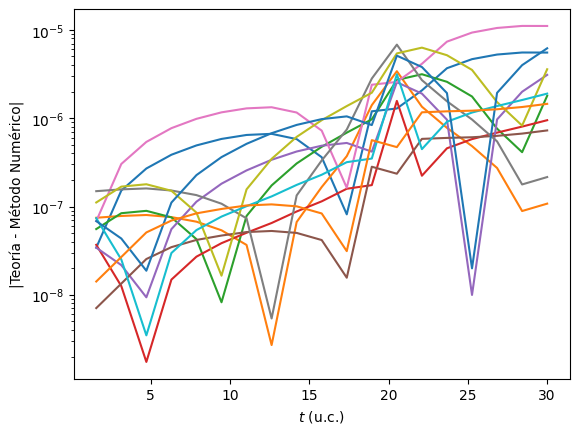

In [68]:
error_rs=abs(rs-rs_teo)
error_vs=abs(vs-vs_teo)

import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.gca()

for i in range(2):
    for j in range(3):
        ax.plot(ts[1:],error_rs[i,1:,j],label="")
        ax.plot(ts[1:],error_vs[i,1:,j],label="")

#Decoración
ax.set_xlabel("$t$ (u.c.)")
ax.set_ylabel("|Teoría - Método Numérico|")
ax.set_yscale("log")

### Variables Universales

Cálculo de la anomalía excéntrica usando la ecuación de Kepler y el método de variables universales:

In [70]:
#Propiedades del sistema
mu=1.0
p=2.0
tp=0.0
t=10.0
e=1.5
a=p/(1-e**2)
q=p/(1+e)

#Anomalía media generalizada
from numpy import sqrt
M=sqrt(mu)*(t-tp)

#Solución usando variables universales
from pymcel.export import metodo_laguerre, funcion_universal_kepler
x,errorx,ni=metodo_laguerre(funcion_universal_kepler,
                            x0=M,args=(M,e,q),delta=1e-14)
Euni=x/sqrt(abs(a))
errorEuni=errorx/sqrt(abs(a))

#Solución usando la ecuación de Kepler
from pymcel.export import kepler_newton
n=sqrt(mu/abs(a)**3)
M=n*(t-tp)
E,errorE,niE=kepler_newton(M,e,delta=1e-14)

from numpy import pi
print(f"E (con variables universales): {Euni*180/pi} grados (error {errorEuni*Euni*180/pi})")
print(f"E (con ecuación de Kepler): {E*180/pi} grados (error {errorE*E*180/pi})")

E (con variables universales): 130.32287447321414 grados (error 0.0)
E (con ecuación de Kepler): 130.32287447321414 grados (error 2.5444437451708134e-14)


### Las funciones f y g

In [72]:
#Sistema
from numpy import array
t0=0
sistema=[
    dict(m=1.0,
         r=array([0.0,0.0,+0.3]),
         v=array([+1.0,0.0,0.5])),
    dict(m=0.5,
         r=array([+1.0,0.0,0.0]),
         v=array([0.0,+1.0,0.0])),
]

#Condiciones iniciales
m1=sistema[0]["m"]
r1_0=sistema[0]["r"]
v1_0=sistema[0]["v"]

m2=sistema[1]["m"]
r2_0=sistema[1]["r"]
v2_0=sistema[1]["v"]

#Posición y velocidad relativa inicial
rvec0=r1_0-r2_0
vvec0=v1_0-v2_0

from pymcel import propaga_f_g
s,f,g,dotf,dotg,rvec,vvec=propaga_f_g(mu,rvec0,vvec0,t0,t,verbose=True)

print(f"Estado para t = {t:g}")
print(f"Variable universal, s = {s:g}")
print(f"f = {f:g}, g = {g:g}")
print(f"f' = {dotf:g}, g' = {dotg:g}")
print(f"r = {rvec}")
print(f"v = {vvec}")

Estado para t = 10
Variable universal, s = 3.72932
f = -8.67675, g = -0.891859
f' = -0.839682, g' = -0.201559
r = [ 7.78488648  0.89185893 -3.04895309]
v = [ 0.63812318  0.20155925 -0.35268435]


### Aproximación de dos cuerpos para sistemas jerárquicos


Consideremos un sistema jerárquico de 2 cuerpos:

In [73]:
sistema=[
    dict(
        m=10.0,
        r=[1,0,0],
        v=[0,1,0.5]),
    dict(
        m=1.0,
        r=[1.5,0,0],
        v=[0,-3,1],
    ),
    dict(
        m=0.01,
        r=[-1,0,0],
        v=[0,3,1],
    )
]

Se puede dividir en dos sistemas:

In [75]:
from numpy import array
sistemaA=[
    dict(
        m=10.0,
        r=array([1,0,0]),
        v=array([0,1,0.5])
    ),
    dict(
        m=1.0,
        r=array([1.5,0,0]),
        v=array([0,-3,1]),
    )
]

masaA=sistemaA[0]["m"]+sistemaA[1]["m"]
r_CM_A=(sistemaA[0]["m"]*sistemaA[0]["r"]+\
        sistemaA[1]["m"]*sistemaA[1]["r"])/masaA
v_CM_A=(sistemaA[0]["m"]*sistemaA[0]["v"]+\
        sistemaA[1]["m"]*sistemaA[1]["v"])/masaA

print("Sistema A:")
print(f"Masa : = {masaA}")
print(f"Posición del centro de masa : = {r_CM_A}")
print(f"Velocidad del centro de masa : = {v_CM_A}")

from numpy import array
sistemaB=[
    dict(
        m=masaA,
        r=r_CM_A,
        v=v_CM_A,
    ),
    dict(
        m=0.01,
        r=array([-1,0,0]),
        v=array([0,3,1]),
    )
]
masaB=sistemaB[0]["m"]+sistemaB[1]["m"]

Sistema A:
Masa : = 11.0
Posición del centro de masa : = [1.04545455 0.         0.        ]
Velocidad del centro de masa : = [0.         0.63636364 0.54545455]


Ahora podemos propagar los dos sistemas independientemente:

In [76]:
from pymcel.export import propaga_estado
t0=0
t=1.0

#Sistema A
r1,v1,r2,v2,rvecA,vvecA=propaga_estado(sistemaA,t0,t)

#Sistema B
rA,vA,r3,v3,rvecB,vvecB=propaga_estado(sistemaB,t0,t)

También podemos integrar el sistema completo:

In [77]:
from pymcel.export import ncuerpos_solucion
ts=[t0,t]
rs,vs,rps,vps,constantes=ncuerpos_solucion(sistema,ts)

Comparemos las soluciones

In [78]:
print("Partícula 1:")
print("\tPosición:")
print(f"\t\tN cuerpos: {rs[0,1,:]}")
print(f"\t\tDos cuerpos: {r1}")
print("\tVelocidad:")
print(f"\t\tN cuerpos: {vs[0,1,:]}")
print(f"\t\tDos cuerpos: {v1}")
print("Partícula 2:")
print("\tPosición:")
print(f"\t\tN cuerpos: {rs[1,1,:]}")
print(f"\t\tDos cuerpos: {r2}")
print("\tVelocidad:")
print(f"\t\tN cuerpos: {vs[1,1,:]}")
print(f"\t\tDos cuerpos: {v2}")
print("Partícula 3:")
print("\tPosición:")
print(f"\t\tN cuerpos: {rs[2,1,:]}")
print(f"\t\tDos cuerpos: {r3}")
print("\tVelocidad:")
print(f"\t\tN cuerpos: {vs[2,1,:]}")
print(f"\t\tDos cuerpos: {v3}")

Partícula 1:
	Posición:
		N cuerpos: [1.0048383  0.65569534 0.54317083]
		Dos cuerpos: [1.00588816 0.65527116 0.5430911 ]
	Velocidad:
		N cuerpos: [0.21350298 0.9523843  0.50633134]
		Dos cuerpos: [0.2152712  0.95124402 0.5060945 ]
Partícula 2:
	Posición:
		N cuerpos: [1.4400009  0.44762822 0.56917975]
		Dos cuerpos: [1.44111843 0.44728838 0.56908895]
	Velocidad:
		N cuerpos: [-2.15539786 -2.51097523  0.93917367]
		Dos cuerpos: [-2.15271202 -2.51244021  0.93905503]
Partícula 3:
	Posición:
		N cuerpos: [0.16161001 2.54183689 0.91119156]
		Dos cuerpos: [0.15798609 2.54292744 0.91210143]
	Velocidad:
		N cuerpos: [2.03681019 1.71322222 0.75129016]
		Dos cuerpos: [2.03238481 1.71734141 0.75333489]


Podemos también hacer una comparación gráfica:

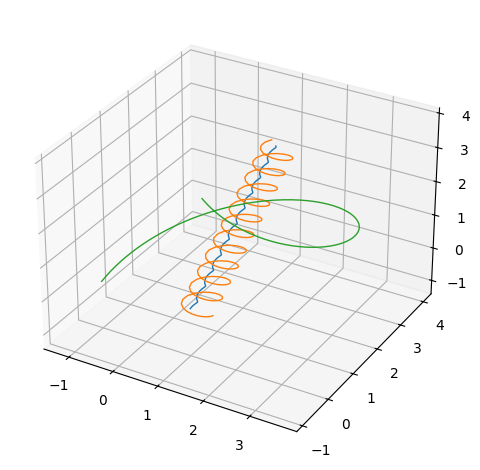

In [80]:
from pymcel.export import propaga_estado
from numpy import linspace

#Ventana de integración
t0=0.0
T=5.0

#Solución al problema de los N cuerpos
from pymcel.export import ncuerpos_solucion
ts=linspace(t0,T,200)
rs_num,vs_num,rps_num,vps_num,constantes=ncuerpos_solucion(sistema,ts)

from numpy import zeros_like
rs_aprox=zeros_like(rs_num)
Nt=20
ts=linspace(t0,T,Nt)
for i,t in enumerate(ts):
    #Sistema A
    ra1,va1,ra2,va2,ravecA,vavecA=propaga_estado(sistemaA,t0,t)

    #Sistema B
    raA,vaA,ra3,va3,ravecB,vavecB=propaga_estado(sistemaB,t0,t)
    
    rs_aprox[0,i]=ra1
    rs_aprox[1,i]=ra2
    rs_aprox[2,i]=ra3
    
#Grafíco
from pymcel.export import plot_ncuerpos_3d
fig=plot_ncuerpos_3d(rs_num,vs_num)
ax=fig.gca()

ax.plot(rs_aprox[0,:Nt,0],rs_aprox[0,:Nt,1],rs_aprox[0,:Nt,2],'b+')
ax.plot(rs_aprox[1,:Nt,0],rs_aprox[1,:Nt,1],rs_aprox[1,:Nt,2],'r+')
ax.plot(rs_aprox[2,:Nt,0],rs_aprox[2,:Nt,1],rs_aprox[2,:Nt,2],'g+')

plt.show()

### Predicciones en el sistema solar

Vamos a obtener la posición y velocidad exacta de la Tierra y Marte para una fecha específica:

In [82]:
from spiceypy import furnsh
furnsh("pymcel/data/de430.tpc")
furnsh("pymcel/data/de430.bsp")

#Fecha de referencia J2000.0
t0=0

#Parametro gravitacional del sistema
from spiceypy import bodvrd
mu=bodvrd("SUN","GM",1)[1][0]

#Vectores de estado de la Tierra y Marte
from spiceypy import spkezr
tierra,tluz=spkezr("EARTH_BARYCENTER",t0,"ECLIPJ2000","None","SUN")
rtierra0=tierra[:3]
vtierra0=tierra[3:]
marte,tluz=spkezr("MARS_BARYCENTER",t0,"ECLIPJ2000","None","SUN")
rmarte0=marte[:3]
vmarte0=marte[3:]

print("Estado inicial de la Tierra (SPICE):")
print(f"\tPosición: {rtierra0}")
print(f"\tVelocidad: {vtierra0}")
print("Estado inicial de Marte (SPICE):")
print(f"\tPosición: {rmarte0}")
print(f"\tVelocidad: {vmarte0}")

Estado inicial de la Tierra (SPICE):
	Posición: [-2.65025770e+07  1.44693956e+08 -1.70505187e+02]
	Velocidad: [-2.97864408e+01 -5.47817684e+00  4.19797701e-05]
Estado inicial de Marte (SPICE):
	Posición: [ 2.08048141e+08 -2.00705251e+06 -5.15628899e+06]
	Velocidad: [ 1.16267242 26.29606454  0.52229699]


Ahora usaremos la rutina `propaga_f_g` para calcular la posiciòn de la Tierra y Marte en el futuro:

In [84]:
#30 días más tarde
t=180*86400

#Propaga la posición de la Tierra
from pymcel.export import propaga_f_g
prediccion_tierra=propaga_f_g(mu,rtierra0,vtierra0,t0,t,verbose=True)
rtierra=prediccion_tierra[5]
vtierra=prediccion_tierra[6]

#Propaga la posición de Marte
prediccion_marte=propaga_f_g(mu,rmarte0,vmarte0,t0,t,verbose=True)
rmarte=prediccion_marte[5]
vmarte=prediccion_marte[6]

print("Estado propagado de la Tierra (aproximación):")
print(f"\tPosición: {rtierra}")
print(f"\tVelocidad: {vtierra}")
print("Estado inicial de Marte (aproximación):")
print(f"\tPosición: {rmarte}")
print(f"\tVelocidad: {vmarte}")

Estado propagado de la Tierra (aproximación):
	Posición: [ 2.12651481e+07 -1.50593536e+08  1.84746693e+02]
	Velocidad: [ 2.90111873e+01  4.05388504e+00 -3.91059499e-05]
Estado inicial de Marte (aproximación):
	Posición: [-3.75596491e+07  2.34997200e+08  5.84626235e+06]
	Velocidad: [-23.00765883  -1.7690655    0.52851442]


Podemos compara este resultado con el mismo pero obtenido con SPICE:

In [85]:
#Vectores de estado de la Tierra y Marte
tierra,tluz=spkezr("EARTH_BARYCENTER",t,"ECLIPJ2000","None","SUN")
marte,tluz=spkezr("MARS_BARYCENTER",t,"ECLIPJ2000","None","SUN")

print("Estado propagado de la Tierra (SPICE):")
print(f"\tPosición: {tierra[:3]}")
print(f"\tVelocidad: {tierra[3:]}")
print("Estado inicial de Marte (SPICE):")
print(f"\tPosición: {marte[:3]}")
print(f"\tVelocidad: {marte[3:]}")

Estado propagado de la Tierra (SPICE):
	Posición: [ 2.12704637e+07 -1.50594283e+08  2.98450430e+02]
	Velocidad: [ 2.90108118e+01  4.05407503e+00 -2.81172149e-05]
Estado inicial de Marte (SPICE):
	Posición: [-3.75381027e+07  2.35025828e+08  5.84580453e+06]
	Velocidad: [-23.00526594  -1.7643746    0.52849927]


Ahora comparemos las posiciones que debería tener Marte en el cielo:

In [86]:
from spiceypy import reclat
#Distancia a Marte, longitud y latitud eclíptica del planeta
dist,long,lat=reclat(marte[:3]-tierra[:3])
#Valores usando la teoría aproximada
dist_aprox,long_aprox,lat_aprox=reclat(rmarte-rtierra)

from numpy import pi
print("Distancia:")
print(f"\tReal: {dist} km")
print(f"\tAprox.: {dist_aprox} km")
print("Longitud eclíptica:")
print(f"\tReal: {long*180/pi:.7f} grados")
print(f"\tAprox.: {long_aprox*180/pi:.7f} grados")
print(f"\tDiferencia: {abs(long_aprox-long)*180/pi*60:.7f} arcmin")
print("Latitud eclíptica:")
print(f"\tReal: {lat*180/pi:.7f} grados")
print(f"\tAprox.: {lat_aprox*180/pi:.7f} grados")
print(f"\tDiferencia: {abs(lat_aprox-lat)*180/pi*60:.7f} arcmin")

Distancia:
	Real: 390122400.20565176 km
	Aprox.: 390095819.98641676 km
Longitud eclíptica:
	Real: 98.6710192 grados
	Aprox.: 98.6740266 grados
	Diferencia: 0.1804482 arcmin
Latitud eclíptica:
	Real: 0.8585392 grados
	Aprox.: 0.8586816 grados
	Diferencia: 0.0085473 arcmin


Hagamos un gráfico de la diferencia entre la posición en el cielo calculada y la real:

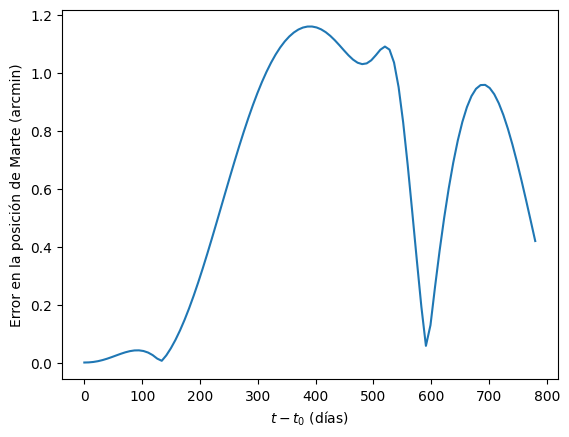

In [87]:
from numpy import linspace

#Tiempos por un período sinódico completo de Marte
ts=linspace(0,780*86400,100)
errores=[]

for t in ts:
    #Propaga la posición de la Tierra
    from spiceypy import prop2b
    prediccion_tierra=prop2b(mu,list(rtierra0)+list(vtierra0),t-t0)
    rtierra=prediccion_tierra[:3]
    vtierra=prediccion_tierra[3:]

    #Propaga la posición de Marte
    from spiceypy import prop2b
    prediccion_marte=prop2b(mu,list(rmarte0)+list(vmarte0),t-t0)
    rmarte=prediccion_marte[:3]
    vmarte=prediccion_marte[3:]
    
    #Calcula las coordenadas predichas
    dist_aprox,long_aprox,lat_aprox=reclat(rmarte-rtierra)
    
    #Obtiene las coordenadas reales de Marte y la Tierra
    tierra,tluz=spkezr("EARTH_BARYCENTER",t,"ECLIPJ2000","None","SUN")
    marte,tluz=spkezr("MARS_BARYCENTER",t,"ECLIPJ2000","None","SUN")
    dist,long,lat=reclat(marte[:3]-tierra[:3])

    #Error en  la posición en minutos de arco
    long_error=abs(long-long_aprox)*180/pi*60
    lat_error=abs(lat-lat_aprox)*180/pi*60
    errores+=[(long_error**2+lat_error**2)**0.5]

#Gráfico
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.gca()
ax.plot(ts/86400,errores);
ax.set_xlabel("$t-t_0$ (días)");
ax.set_ylabel("Error en la posición de Marte (arcmin)");

<hr/>

Para explorar más cuadernos del libro vaya al [repositorio de en GitHub](https://github.com/seap-udea/pymcel/tree/main/ejemplos/cuadernos-libro)